In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [6]:
df = pd.read_csv("airbnb_clean.csv")
print(df)
df.head()
df.shape

      Manali, Himachal Pradesh, India  False   32.2233  77.18228  \
0     Manali, Himachal Pradesh, India  False  32.22352  77.18152   
1                          Goa, India  False  15.50400    73.866   
2    Bhuntar, Himachal Pradesh, India  False  31.88656  77.14467   
3            Jaipur, Rajasthan, India  False  26.85991  75.66909   
4    Bhuntar, Himachal Pradesh, India  False  32.01248  77.29114   
..                                ...    ...       ...       ...   
492       Nalambi, Maharashtra, India   True  19.22775  73.21889   
493      Sughandhagiry, Kerala, India  False  11.58006  75.99667   
494  Chalnichhina, Uttarakhand, India   True  29.55470  79.80569   
495                        Goa, India   True  15.59870  73.75698   
496             Munnar, Kerala, India  False  10.15926  77.17119   

                            HighQ Manali / Deluxe Room   3   8946  \
0                         Highq manali / 3 BHK Cottage   9   9124   
1          Best view of the river from your t

(497, 9)

In [7]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Manali, Himachal Pradesh, India  497 non-null    object 
 1   False                            497 non-null    bool   
 2   32.2233                          497 non-null    float64
 3   77.18228                         497 non-null    object 
 4   HighQ Manali / Deluxe Room       497 non-null    object 
 5   3                                497 non-null    int64  
 6   8946                             497 non-null    int64  
 7   Room in hotel/home               497 non-null    object 
 8   4.7                              497 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 31.7+ KB


Manali, Himachal Pradesh, India    0
False                              0
32.2233                            0
77.18228                           0
HighQ Manali / Deluxe Room         0
3                                  0
8946                               0
Room in hotel/home                 0
4.7                                0
dtype: int64

In [9]:
df.dtypes

Manali, Himachal Pradesh, India     object
False                                 bool
32.2233                            float64
77.18228                            object
HighQ Manali / Deluxe Room          object
3                                    int64
8946                                 int64
Room in hotel/home                  object
4.7                                float64
dtype: object

In [11]:
df.to_csv("airbnb_clean_ready.csv", index=False)

In [12]:
df = pd.read_csv(r"airbnb_clean.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,"Manali, Himachal Pradesh, India",False,32.22330,77.18228,HighQ Manali / Deluxe Room,3,8946,Room in hotel/home,4.70
1,"Manali, Himachal Pradesh, India",False,32.22352,77.18152,Highq manali / 3 BHK Cottage,9,9124,Room in hotel/home,4.70
2,"Goa, India",False,15.50400,73.866,Best view of the river from your terrace 04,4,9900,Private room,4.00
3,"Bhuntar, Himachal Pradesh, India",False,31.88656,77.14467,Shabashe,1,8684,Shared room,4.70
4,"Jaipur, Rajasthan, India",False,26.85991,75.66909,Luxurious Independent Studio with Wifi & Kitchen,1,20690,Entire place,4.75


In [14]:
df.columns = [
    'address',
    'isHostedBySuperhost',
    'location_lat',
    'location_lng',
    'name',
    'numberOfGuests',
    'price_inr',
    'roomType',
    'stars'
]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              498 non-null    object 
 1   isHostedBySuperhost  498 non-null    bool   
 2   location_lat         498 non-null    float64
 3   location_lng         498 non-null    object 
 4   name                 498 non-null    object 
 5   numberOfGuests       498 non-null    int64  
 6   price_inr            498 non-null    int64  
 7   roomType             498 non-null    object 
 8   stars                498 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 31.7+ KB


,address,isHostedBySuperhost,location_lat,location_lng,name,numberOfGuests,price_inr,roomType,stars
0,"Manali, Himachal Pradesh, India",False,32.22330,77.18228,HighQ Manali / Deluxe Room,3,8946,Room in hotel/home,4.70
1,"Manali, Himachal Pradesh, India",False,32.22352,77.18152,Highq manali / 3 BHK Cottage,9,9124,Room in hotel/home,4.70
2,"Goa, India",False,15.50400,73.866,Best view of the river from your terrace 04,4,9900,Private room,4.00
3,"Bhuntar, Himachal Pradesh, India",False,31.88656,77.14467,Shabashe,1,8684,Shared room,4.70
4,"Jaipur, Rajasthan, India",False,26.85991,75.66909,Luxurious Independent Studio with Wifi & Kitchen,1,20690,Entire place,4.75


In [17]:
df['City'] = df['address'].apply(lambda x: x.split(',')[0].strip())
df['City'].value_counts().head(10)

City
Candolim     26
New Delhi    22
Lonavla      16
Anjuna       15
Jaipur       14
Calangute    14
Lonavala     13
Udaipur      11
Gurugram     11
Goa          10
Name: count, dtype: int64

In [18]:
df['location_lng'] = pd.to_numeric(df['location_lng'], errors='coerce')
df['numberOfGuests'] = df['numberOfGuests'].astype(int)
df['price_inr'] = df['price_inr'].astype(int)
df['stars'] = df['stars'].astype(float)
df.dtypes

address                 object
isHostedBySuperhost       bool
location_lat           float64
location_lng           float64
name                    object
numberOfGuests           int64
price_inr                int64
roomType                object
stars                  float64
City                    object
dtype: object

In [19]:
df.describe(include='all')

,address,isHostedBySuperhost,location_lat,location_lng,name,numberOfGuests,price_inr,roomType,stars,City
count,498,498,498.000000,497.000000,498,498.000000,498.000000,498,498.000000,498
unique,217,2,NaN,NaN,498,NaN,NaN,13,NaN,204
top,"Candolim, Goa, India",False,NaN,NaN,HighQ Manali / Deluxe Room,NaN,NaN,Entire place,NaN,Candolim
freq,23,416,NaN,NaN,1,NaN,NaN,334,NaN,26
mean,NaN,NaN,19.687680,75.251938,NaN,11.546185,939.578313,NaN,4.680783,NaN
std,NaN,NaN,6.507313,2.453547,NaN,4.547411,2121.939054,NaN,0.246368,NaN
min,NaN,NaN,9.418870,70.708440,NaN,1.000000,129.000000,NaN,2.330000,NaN
25%,NaN,NaN,15.526167,73.747990,NaN,8.000000,433.000000,NaN,4.700000,NaN
50%,NaN,NaN,17.923900,73.806850,NaN,12.000000,508.500000,NaN,4.700000,NaN
75%,NaN,NaN,26.811205,77.021460,NaN,16.000000,726.750000,NaN,4.700000,NaN


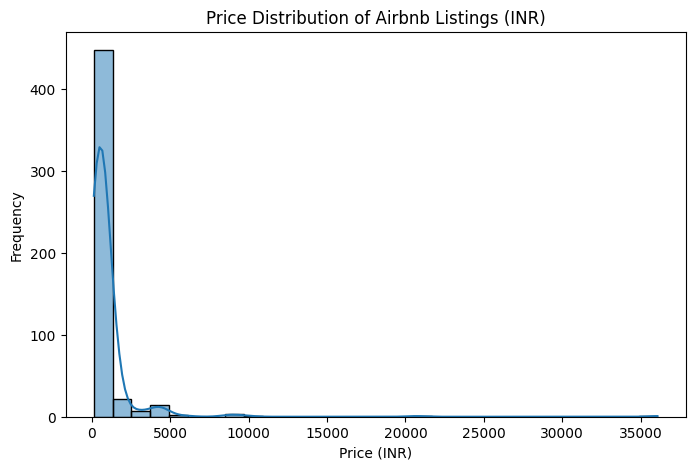

In [20]:
# UNIVARIATE ANALYSIS
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['price_inr'], bins=30, kde=True)
plt.title('Price Distribution of Airbnb Listings (INR)')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

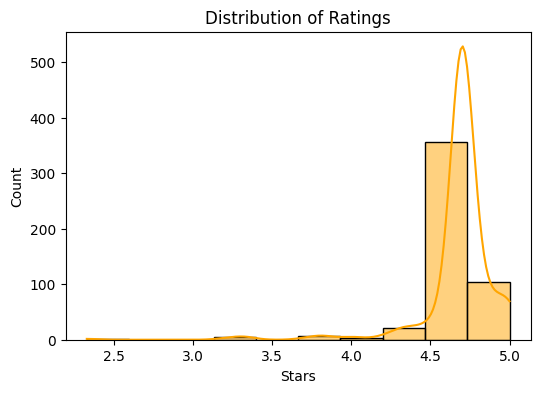

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df['stars'], bins=10, kde=True, color='orange')
plt.title('Distribution of Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

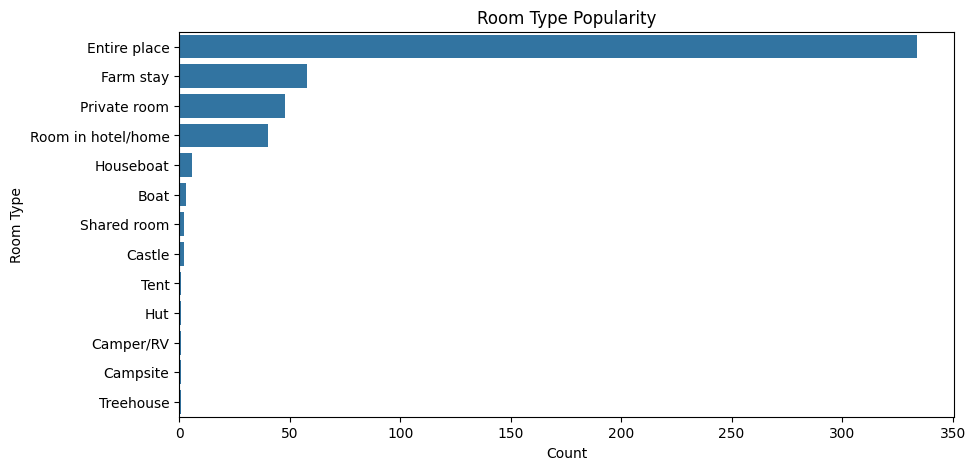

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(y='roomType', data=df, order=df['roomType'].value_counts().index)
plt.title('Room Type Popularity')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.show()

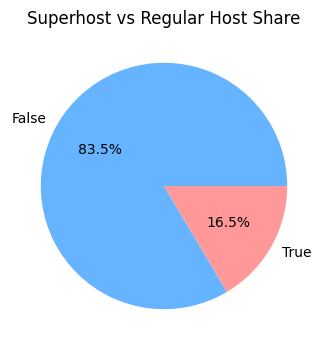

In [23]:
plt.figure(figsize=(4,4))
df['isHostedBySuperhost'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', labels=['False','True'], colors=['#66b3ff','#ff9999'])
plt.title('Superhost vs Regular Host Share')
plt.ylabel('')
plt.show()

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_35168\3287514005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['City'].value_counts().head(10).index,


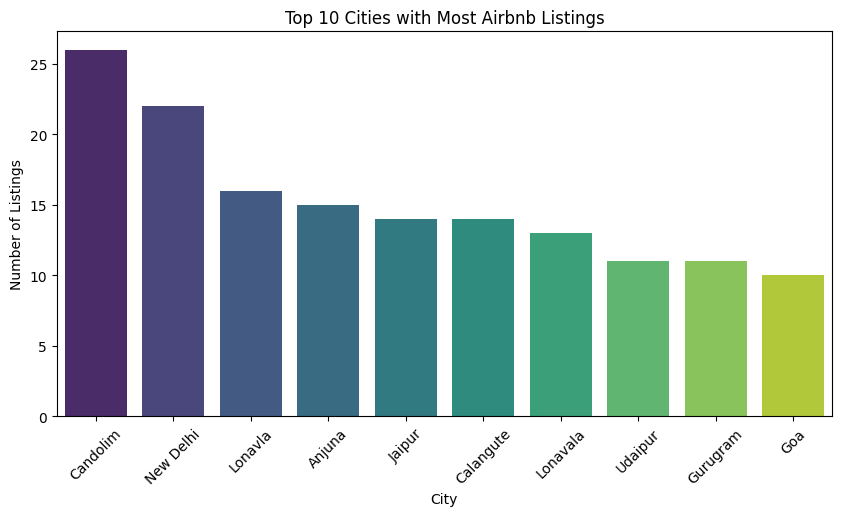

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['City'].value_counts().head(10).index,
            y=df['City'].value_counts().head(10).values,
            palette='viridis')
plt.title('Top 10 Cities with Most Airbnb Listings')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

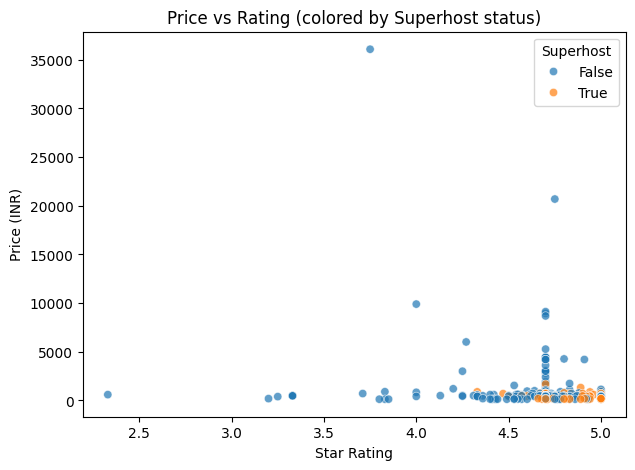

In [25]:
# BIVARIATE ANALYSIS
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='stars', y='price_inr', hue='isHostedBySuperhost', alpha=0.7)
plt.title('Price vs Rating (colored by Superhost status)')
plt.xlabel('Star Rating')
plt.ylabel('Price (INR)')
plt.legend(title='Superhost')
plt.show()

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_35168\2189694590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='roomType', y='price_inr',


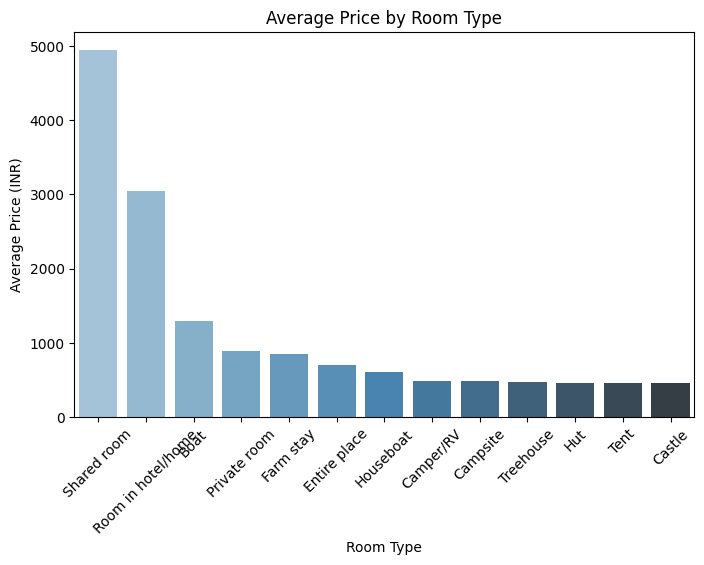

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='roomType', y='price_inr',
            estimator='mean', errorbar=None, palette='Blues_d',
            order=df.groupby('roomType')['price_inr'].mean().sort_values(ascending=False).index)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=45)
plt.show()

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_35168\608951006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='isHostedBySuperhost', y='price_inr', estimator='mean',
C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_35168\608951006.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='isHostedBySuperhost', y='stars', estimator='mean',


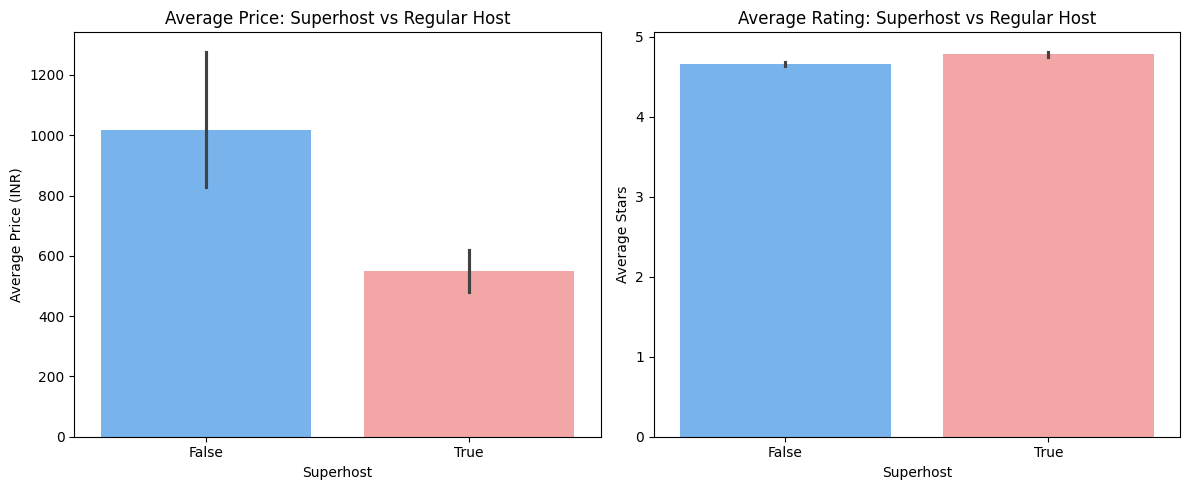

In [28]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.barplot(data=df, x='isHostedBySuperhost', y='price_inr', estimator='mean',
            palette=['#66b3ff','#ff9999'], ax=ax[0])
ax[0].set_title('Average Price: Superhost vs Regular Host')
ax[0].set_xlabel('Superhost')
ax[0].set_ylabel('Average Price (INR)')

sns.barplot(data=df, x='isHostedBySuperhost', y='stars', estimator='mean',
            palette=['#66b3ff','#ff9999'], ax=ax[1])
ax[1].set_title('Average Rating: Superhost vs Regular Host')
ax[1].set_xlabel('Superhost')
ax[1].set_ylabel('Average Stars')

plt.tight_layout()
plt.show()

C:\Users\DIVYA BASANTRAY\AppData\Local\Temp\ipykernel_35168\139126857.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['City'].isin(top_cities)],


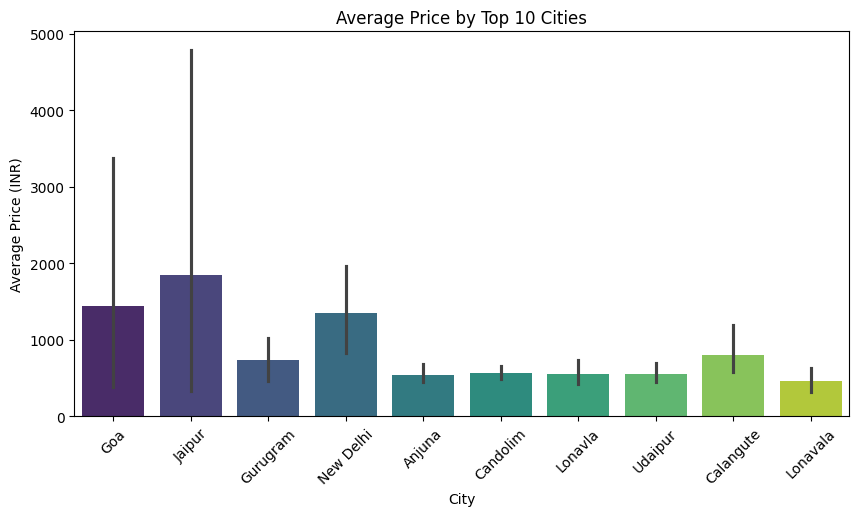

In [30]:
top_cities = df['City'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.barplot(data=df[df['City'].isin(top_cities)],
            x='City', y='price_inr', estimator='mean',
            palette='viridis')
plt.title('Average Price by Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=45)
plt.show()